# Classification : Hotel Bookings Cancellation

**Loading the packages and the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('INNHotelsGroup53k.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1.0,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0.0,0.0,0.0,65.00,0,Not_Canceled
1,INN00002,2.0,0.0,2.0,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0.0,0.0,0.0,106.68,1,Not_Canceled
2,INN00003,1.0,0.0,2.0,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0.0,0.0,0.0,60.00,0,Canceled
3,INN00004,2.0,0.0,0.0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0.0,0.0,0.0,100.00,0,Canceled
4,INN00005,2.0,0.0,1.0,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0.0,0.0,0.0,94.50,0,Canceled


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53252 entries, 0 to 53251
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            53252 non-null  object 
 1   no_of_adults                          52209 non-null  float64
 2   no_of_children                        52745 non-null  float64
 3   no_of_weekend_nights                  52691 non-null  float64
 4   no_of_week_nights                     53252 non-null  int64  
 5   type_of_meal_plan                     52519 non-null  object 
 6   required_car_parking_space            53050 non-null  float64
 7   room_type_reserved                    52598 non-null  object 
 8   lead_time                             53252 non-null  int64  
 9   arrival_year                          53252 non-null  int64  
 10  arrival_month                         53252 non-null  int64  
 11  arrival_date   

In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,52209.000000,52745.000000,52691.000000,53252.000000,53050.000000,53252.000000,53252.000000,53252.000000,53252.000000,53162.000000,53162.000000,53162.00000,53252.000000,53252.000000
mean,1.845410,0.105091,0.812454,2.205175,0.031367,85.328063,2017.821378,7.426557,15.590513,0.025639,0.022930,0.15148,103.497649,0.622117
std,0.518086,0.404746,0.871674,1.414985,0.174308,86.114896,0.383039,3.070136,8.733643,0.158056,0.364089,1.72512,35.053147,0.787821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.00000,80.315000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.00000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.00000,120.120000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.00000,540.000000,5.000000


**1. Handle the categorical variables**

i. type_of_meal_plan

In [5]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     40253
Not Selected     7486
Meal Plan 2      4771
Meal Plan 3         9
Name: count, dtype: int64

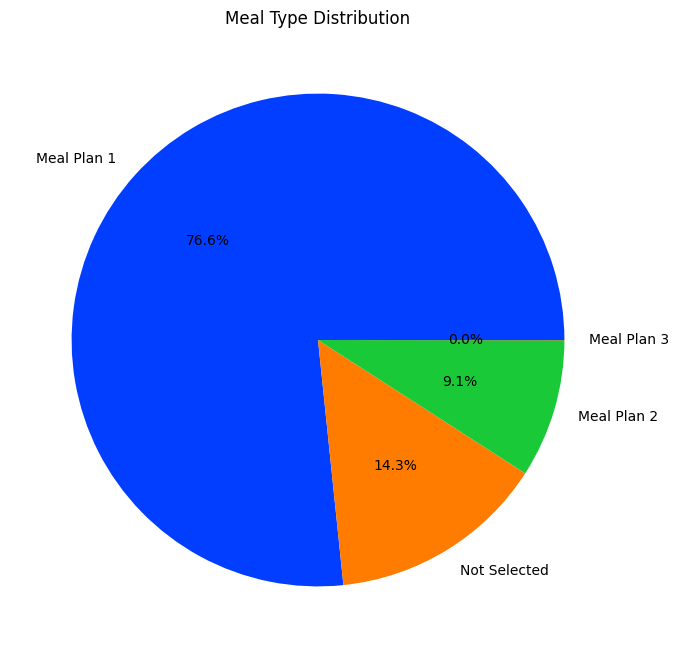

In [6]:
meals = ['Meal Plan 1','Not Selected','Meal Plan 2','Meal Plan 3']

plt.figure(figsize=(8,8))
plt.pie(df['type_of_meal_plan'].value_counts(),labels=meals,autopct='%1.1f%%',colors=sns.color_palette('bright'))
plt.title('Meal Type Distribution')
plt.show()

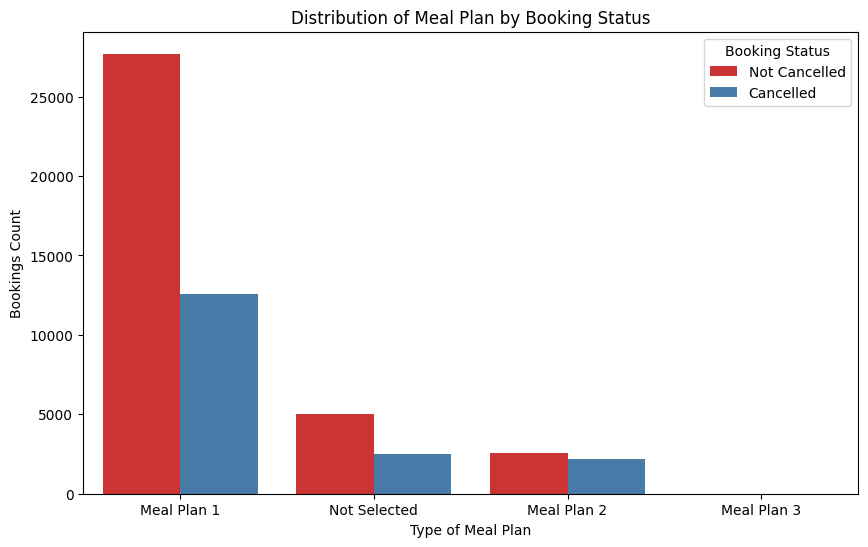

In [7]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=df, x="type_of_meal_plan", hue="booking_status", palette="Set1")
plt.xlabel("Type of Meal Plan")
plt.ylabel("Bookings Count")
plt.title("Distribution of Meal Plan by Booking Status")
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])
plt.show()

In [8]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected':0,'Meal Plan 1':1,'Meal Plan 2':2,'Meal Plan 3':3})

In [9]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
1.0    40253
0.0     7486
2.0     4771
3.0        9
Name: count, dtype: int64

ii. room_type_reserved

In [10]:
room_type_value_counts = df['room_type_reserved'].value_counts()
room_type_value_counts

room_type_reserved
Room_Type 1    40779
Room_Type 4     8803
Room_Type 6     1404
Room_Type 2      994
Room_Type 5      379
Room_Type 7      230
Room_Type 3        9
Name: count, dtype: int64

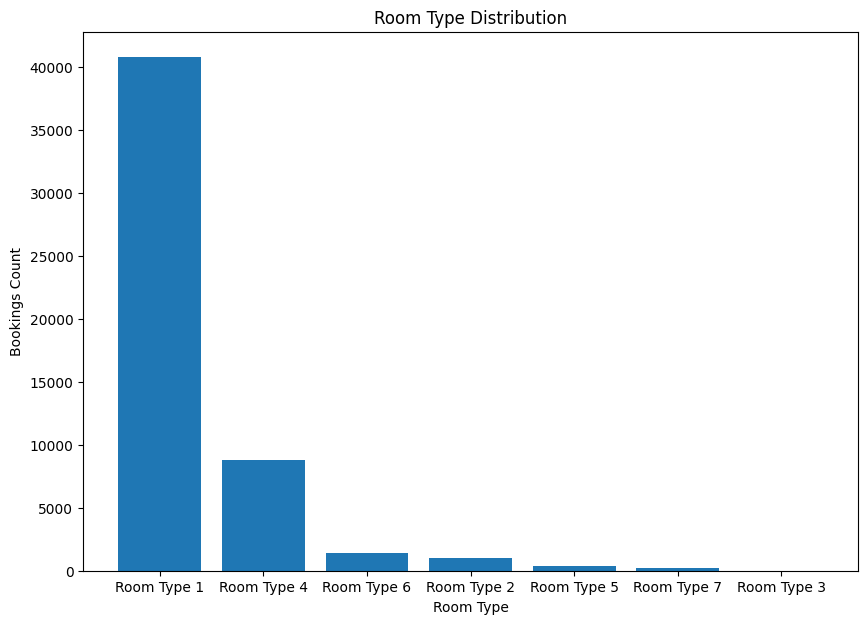

In [11]:
rooms = ['Room Type 1','Room Type 4','Room Type 6','Room Type 2','Room Type 5','Room Type 7','Room Type 3']

plt.figure(figsize=(10,7))
plt.bar(rooms,room_type_value_counts)
plt.xlabel('Room Type')
plt.ylabel('Bookings Count')
plt.title('Room Type Distribution')
plt.show()

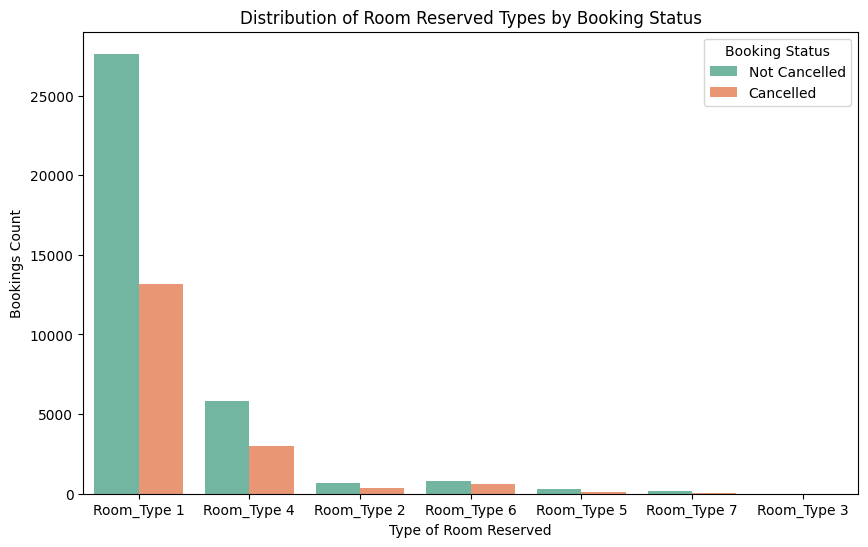

In [13]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=df, x="room_type_reserved", hue="booking_status", palette="Set2")
plt.xlabel("Type of Room Reserved")
plt.ylabel("Bookings Count")
plt.title("Distribution of Room Reserved Types by Booking Status")
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])
plt.show()

In [14]:
# Create a mapping dictionary
room_type_mapping = {
    'Room_Type 1': 1,
    'Room_Type 2': 2,
    'Room_Type 3': 3,
    'Room_Type 4': 4,
    'Room_Type 5': 5,
    'Room_Type 6': 6,
    'Room_Type 7': 7
}

# Use the map() function to replace values in the 'room_type_reserved' column
df['room_type_reserved'] = df['room_type_reserved'].map(room_type_mapping)

In [15]:
df['room_type_reserved'].value_counts()

room_type_reserved
1.0    40779
4.0     8803
6.0     1404
2.0      994
5.0      379
7.0      230
3.0        9
Name: count, dtype: int64

iii. market_segment_type

In [16]:
df['market_segment_type'].value_counts()

market_segment_type
Online           33687
Offline          14895
Corporate         2910
Complementary      545
Aviation           188
Name: count, dtype: int64

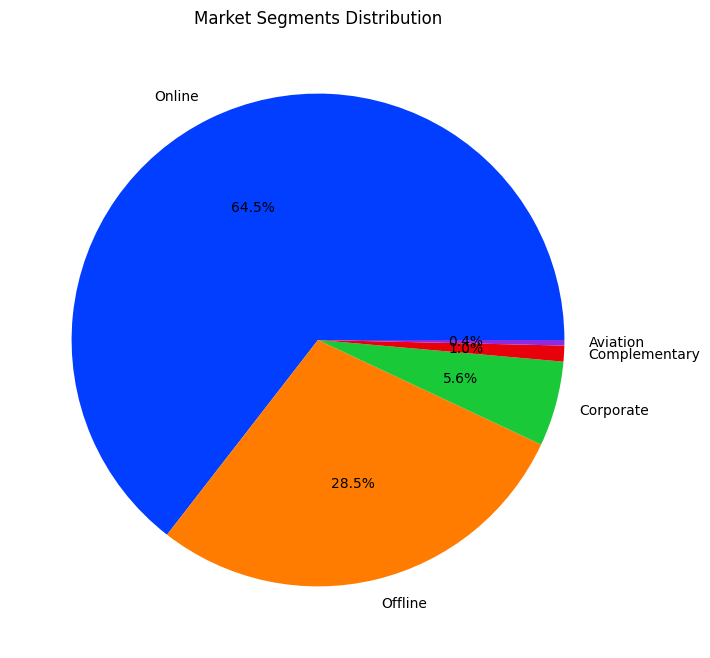

In [17]:
market_segments = ['Online','Offline','Corporate','Complementary','Aviation']

plt.figure(figsize=(8,8))
plt.pie(df['market_segment_type'].value_counts(),labels=market_segments,autopct='%1.1f%%',colors=sns.color_palette('bright'))
plt.title('Market Segments Distribution')
plt.show()

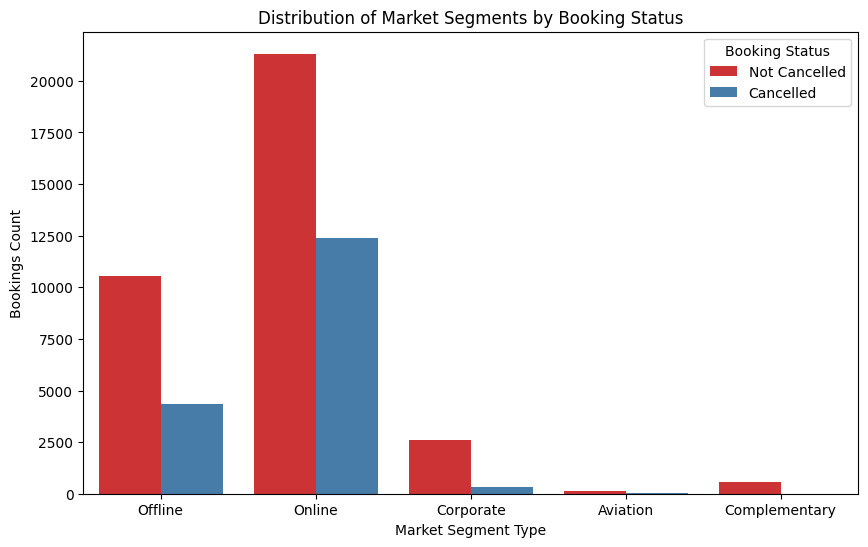

In [18]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=df, x="market_segment_type", hue="booking_status", palette="Set1")
plt.xlabel("Market Segment Type")
plt.ylabel("Bookings Count")
plt.title("Distribution of Market Segments by Booking Status")
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])
plt.show()

In [19]:
df = pd.get_dummies(df,columns=['market_segment_type'],prefix='marget_segment',dtype=int)

iv. booking_status

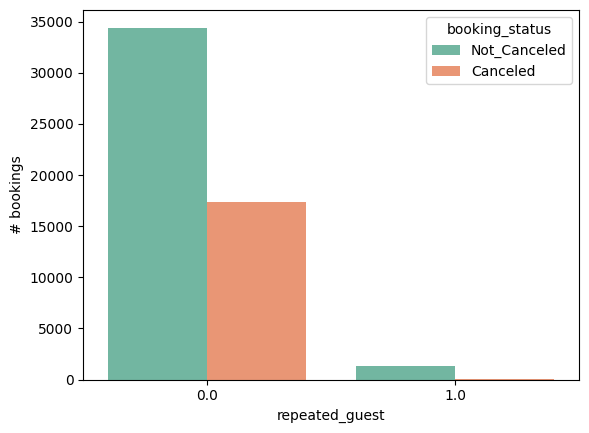

In [20]:
sns.countplot(data=df, x="repeated_guest", hue="booking_status", palette="Set2")
plt.ylabel('# bookings')
plt.show()

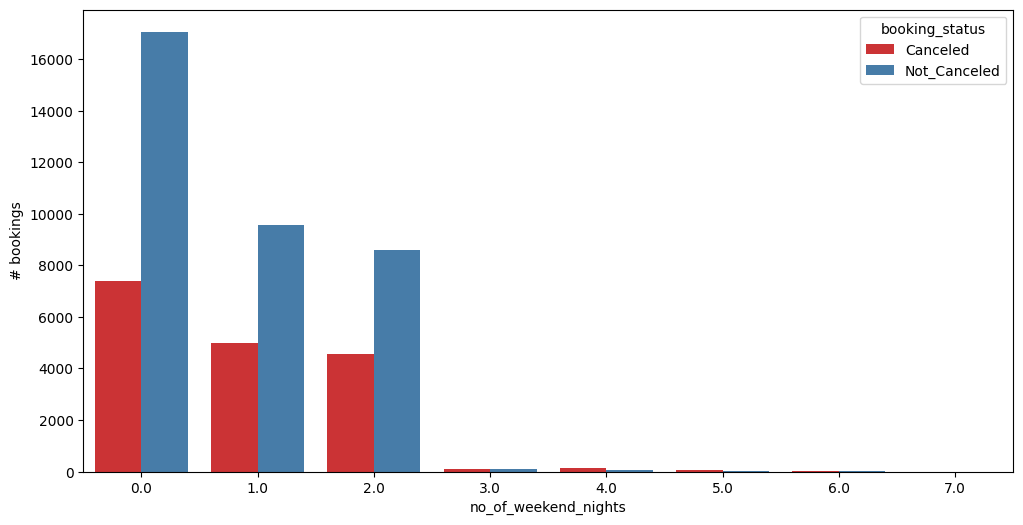

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="no_of_weekend_nights", hue="booking_status", palette="Set1")
plt.ylabel('# bookings')
plt.show()

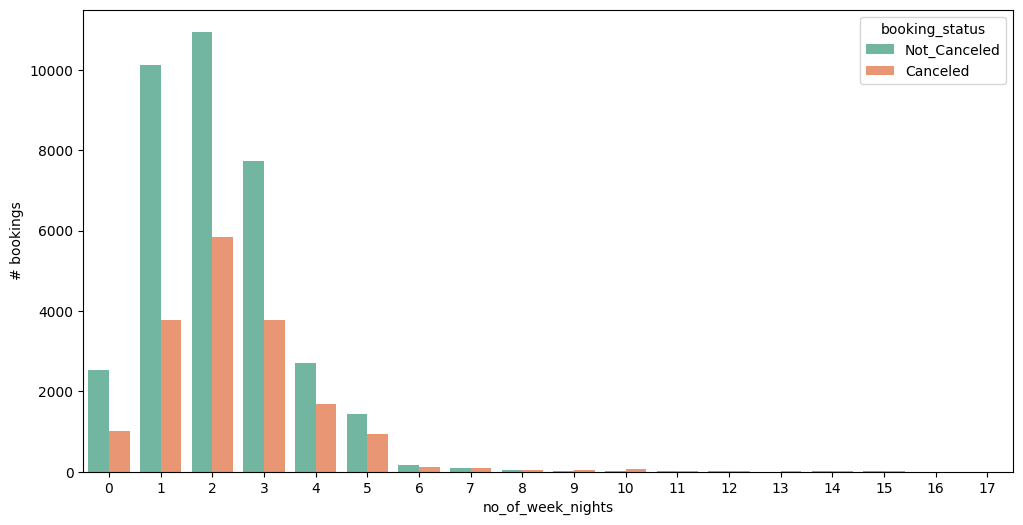

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="no_of_week_nights", hue="booking_status", palette="Set2")
plt.ylabel('# bookings')
plt.show()

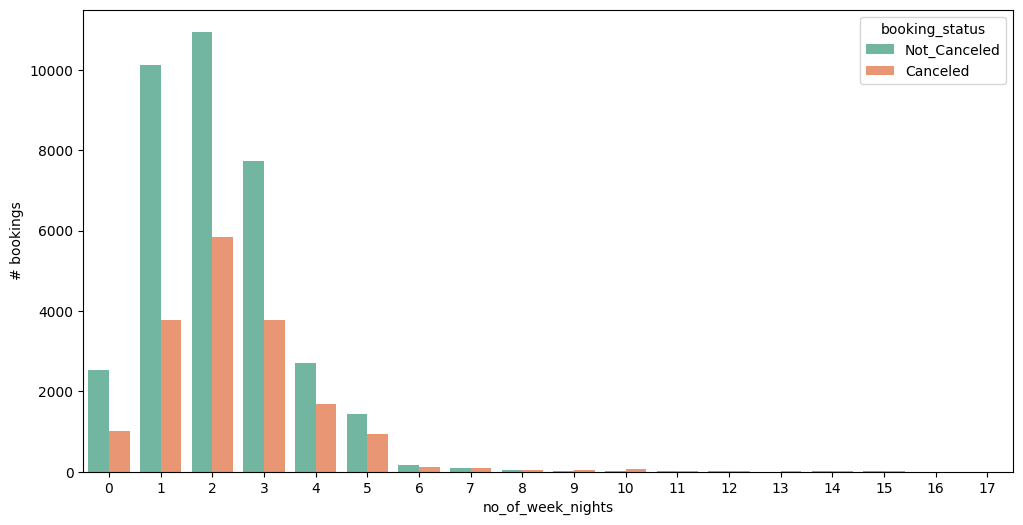

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="no_of_week_nights", hue="booking_status", palette="Set2")
plt.ylabel('# bookings')
plt.show()

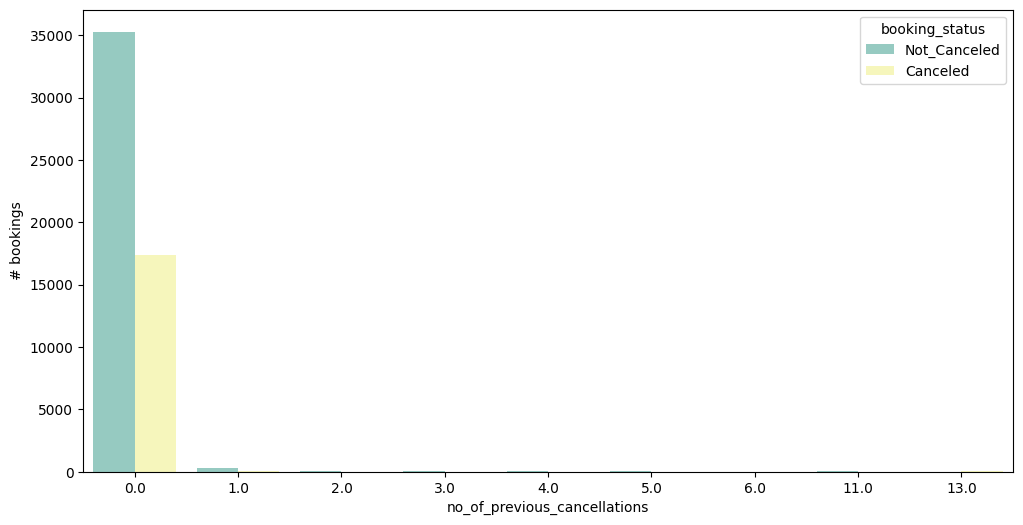

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="no_of_previous_cancellations", hue="booking_status", palette="Set3")
plt.ylabel('# bookings')
plt.show()

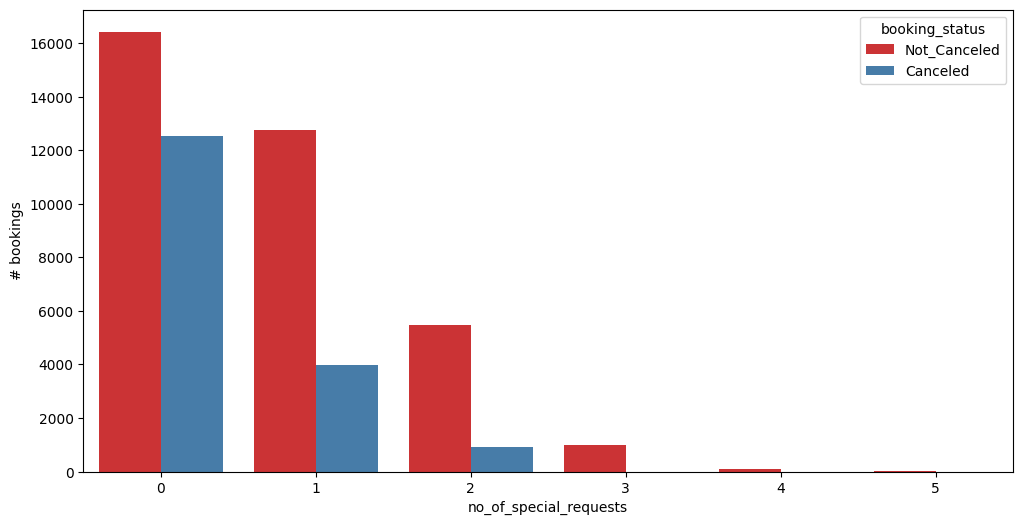

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="no_of_special_requests", hue="booking_status", palette="Set1")
plt.ylabel('# bookings')
plt.show()

In [26]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    35817
Canceled        17435
Name: count, dtype: int64

In [27]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled':0,'Canceled':1})

**2. Handle the missing values.**

In [28]:
df.isnull().sum()

Booking_ID                                 0
no_of_adults                            1043
no_of_children                           507
no_of_weekend_nights                     561
no_of_week_nights                          0
type_of_meal_plan                        733
required_car_parking_space               202
room_type_reserved                       654
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
repeated_guest                            90
no_of_previous_cancellations              90
no_of_previous_bookings_not_canceled      90
avg_price_per_room                         0
no_of_special_requests                     0
booking_status                             0
marget_segment_Aviation                    0
marget_segment_Complementary               0
marget_segment_Corporate                   0
marget_segment_Offline                     0
marget_seg

repeated_guest

In [29]:
df['repeated_guest'].value_counts()

repeated_guest
0.0    51799
1.0     1363
Name: count, dtype: int64

In [30]:
df['repeated_guest'] = df['repeated_guest'].fillna(df['repeated_guest'].mode().iloc[0])

no_of_previous_cancellations

In [31]:
df['no_of_previous_cancellations'].value_counts()

no_of_previous_cancellations
0.0     52671
1.0       288
2.0        67
3.0        66
11.0       34
5.0        16
4.0        12
13.0        7
6.0         1
Name: count, dtype: int64

In [32]:
df['no_of_previous_cancellations'] = df['no_of_previous_cancellations'].fillna(df['no_of_previous_cancellations'].mode().iloc[0])

In [33]:
df['no_of_previous_cancellations'].isna().sum()

0

no_of_previous_bookings_not_canceled

In [34]:
df['no_of_previous_bookings_not_canceled'].value_counts()

no_of_previous_bookings_not_canceled
0.0     51971
1.0       350
2.0       158
3.0       108
5.0        92
4.0        91
6.0        54
7.0        35
8.0        33
9.0        29
10.0       26
11.0       24
12.0       17
14.0       15
15.0       12
16.0       11
13.0       10
21.0       10
18.0       10
22.0       10
19.0        9
17.0        8
20.0        7
25.0        5
24.0        4
23.0        4
27.0        3
48.0        3
28.0        3
31.0        3
26.0        3
53.0        2
42.0        2
29.0        2
30.0        2
32.0        2
44.0        2
47.0        2
37.0        2
35.0        2
51.0        2
34.0        2
33.0        2
38.0        2
52.0        2
49.0        2
39.0        2
55.0        1
45.0        1
56.0        1
57.0        1
46.0        1
54.0        1
43.0        1
58.0        1
41.0        1
50.0        1
40.0        1
36.0        1
Name: count, dtype: int64

In [35]:
df['no_of_previous_bookings_not_canceled'] = df['no_of_previous_bookings_not_canceled'].fillna(df['no_of_previous_bookings_not_canceled'].mode().iloc[0])

In [36]:
df['no_of_previous_bookings_not_canceled'].isna().sum()

0

no_of_adults

In [37]:
df['no_of_adults'].value_counts()

no_of_adults
2.0    37611
1.0    11045
3.0     3332
0.0      200
4.0       21
Name: count, dtype: int64

In [38]:
df['no_of_adults'] = df['no_of_adults'].fillna(df['no_of_adults'].mode().iloc[0])

no_of_children

In [39]:
df['no_of_children'].value_counts()

no_of_children
0.0     48833
1.0      2350
2.0      1531
3.0        25
9.0         4
10.0        2
Name: count, dtype: int64

In [40]:
df['no_of_children'] = df['no_of_children'].fillna(df['no_of_children'].mode().iloc[0])

no_of_weekend_nights 

In [41]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0.0    24454
1.0    14555
2.0    13185
3.0      219
4.0      195
5.0       52
6.0       30
7.0        1
Name: count, dtype: int64

In [42]:
df['no_of_weekend_nights'] = df['no_of_weekend_nights'].fillna(df['no_of_weekend_nights'].mode().iloc[0])

type_of_meal_plan

In [43]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
1.0    40253
0.0     7486
2.0     4771
3.0        9
Name: count, dtype: int64

In [44]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].fillna(df['type_of_meal_plan'].mode().iloc[0])

required_car_parking_space

In [45]:
df['required_car_parking_space'].value_counts()

required_car_parking_space
0.0    51386
1.0     1664
Name: count, dtype: int64

In [46]:
df['required_car_parking_space'] = df['required_car_parking_space'].fillna(df['required_car_parking_space'].mode().iloc[0])

room_type_reserved

In [47]:
df['room_type_reserved'].value_counts()

room_type_reserved
1.0    40779
4.0     8803
6.0     1404
2.0      994
5.0      379
7.0      230
3.0        9
Name: count, dtype: int64

In [48]:
df['room_type_reserved'] = df['room_type_reserved'].fillna(df['room_type_reserved'].mode().iloc[0])

In [49]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
marget_segment_Aviation                 0
marget_segment_Complementary            0
marget_segment_Corporate                0
marget_segment_Offline                  0
marget_segment_Online                   0
dtype: int64

### Data Preprocessing

**1. Dropping Booking_ID column.**

In [50]:
df.drop(columns=['Booking_ID'],inplace=True)

In [51]:
df.corr()['booking_status'].sort_values()

no_of_special_requests                 -0.254362
marget_segment_Corporate               -0.113693
repeated_guest                         -0.106996
required_car_parking_space             -0.085055
marget_segment_Complementary           -0.070946
no_of_previous_bookings_not_canceled   -0.060121
marget_segment_Offline                 -0.046868
no_of_previous_cancellations           -0.031583
arrival_month                          -0.011236
marget_segment_Aviation                -0.003071
arrival_date                            0.007232
room_type_reserved                      0.022032
no_of_children                          0.032991
type_of_meal_plan                       0.049751
no_of_weekend_nights                    0.059776
no_of_adults                            0.082811
no_of_week_nights                       0.093208
marget_segment_Online                   0.111451
avg_price_per_room                      0.137601
arrival_year                            0.177947
lead_time           

lead_time and the columns arrival_year, arrival_month,arrival_date represent the same property. (Multi-colinearity) So, it needs to be removed

In [52]:
df.drop(columns=['arrival_year','arrival_month','arrival_date'],inplace=True)

**2. Scale the data**

In [53]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,marget_segment_Aviation,marget_segment_Complementary,marget_segment_Corporate,marget_segment_Offline,marget_segment_Online
0,2.0,0.0,1.0,2,1.0,0.0,1.0,224,0.0,0.0,0.0,65.00,0,0,0,0,0,1,0
1,2.0,0.0,2.0,3,0.0,0.0,1.0,5,0.0,0.0,0.0,106.68,1,0,0,0,0,0,1
2,1.0,0.0,2.0,1,1.0,0.0,1.0,1,0.0,0.0,0.0,60.00,0,1,0,0,0,0,1
3,2.0,0.0,0.0,2,1.0,0.0,1.0,211,0.0,0.0,0.0,100.00,0,1,0,0,0,0,1
4,2.0,0.0,1.0,1,0.0,0.0,1.0,48,0.0,0.0,0.0,94.50,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53247,0.0,2.0,0.0,2,1.0,0.0,2.0,187,0.0,0.0,0.0,86.50,0,1,0,0,0,0,1
53248,1.0,0.0,2.0,4,1.0,0.0,1.0,245,0.0,0.0,0.0,110.00,0,1,0,0,0,1,0
53249,1.0,0.0,0.0,3,2.0,0.0,1.0,85,0.0,0.0,0.0,100.00,0,0,0,0,0,1,0
53250,2.0,0.0,1.0,3,1.0,0.0,1.0,166,0.0,0.0,0.0,118.80,2,1,0,0,0,0,1


In [55]:
cont = df.iloc[:,[7,11]]
cont

,lead_time,avg_price_per_room
0,224,65.00
1,5,106.68
2,1,60.00
3,211,100.00
4,48,94.50
...,...,...
53247,187,86.50
53248,245,110.00
53249,85,100.00
53250,166,118.80


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont = scaler.fit_transform(cont)
cont = pd.DataFrame(cont)

In [57]:
cont.columns = ['lead_time_scaled','avg_price_per_room_scaled']

In [58]:
cont.isnull().sum()

lead_time_scaled             0
avg_price_per_room_scaled    0
dtype: int64

In [59]:
df = pd.concat([df,cont],axis=1)

In [60]:
df.drop(columns=['lead_time','avg_price_per_room'],inplace=True)

In [61]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,marget_segment_Aviation,marget_segment_Complementary,marget_segment_Corporate,marget_segment_Offline,marget_segment_Online,lead_time_scaled,avg_price_per_room_scaled
0,2.0,0.0,1.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1.610328,-1.098275
1,2.0,0.0,2.0,3,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,1,-0.932810,0.090787
2,1.0,0.0,2.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,-0.979260,-1.240917
3,2.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,1.459366,-0.099782
4,2.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,1,-0.433472,-0.256688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53247,0.0,2.0,0.0,2,1.0,0.0,2.0,0.0,0.0,0.0,0,1,0,0,0,0,1,1.180666,-0.484915
53248,1.0,0.0,2.0,4,1.0,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,1,0,1.854191,0.185502
53249,1.0,0.0,0.0,3,2.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,-0.003810,-0.099782
53250,2.0,0.0,1.0,3,1.0,0.0,1.0,0.0,0.0,0.0,2,1,0,0,0,0,1,0.936803,0.436551


<Axes: >

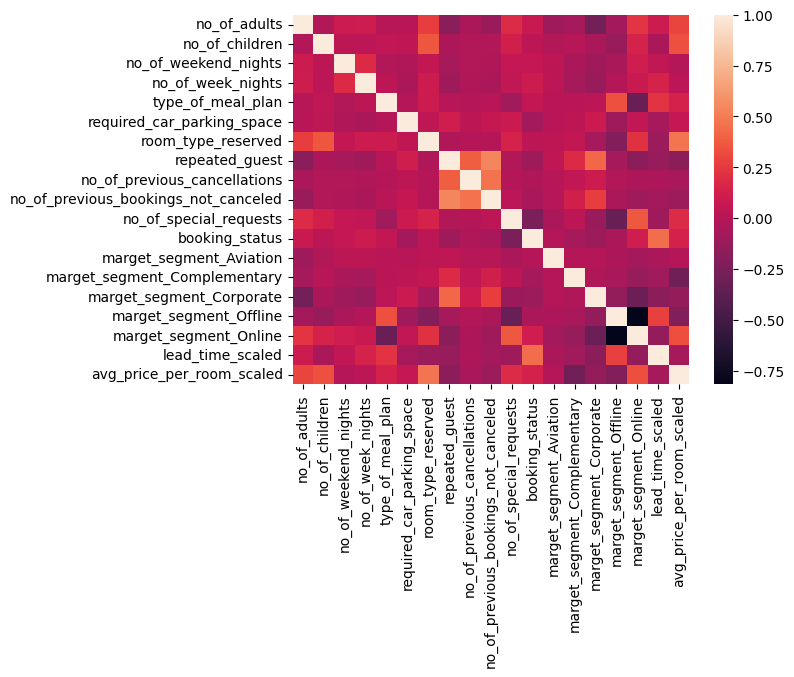

In [62]:
sns.heatmap(df.corr())

**3. Split the data into training ad testing data.**

In [63]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [90]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(sampling_strategy='auto')
X_resampled2, y_resampled2 = under_sampler.fit_resample(X,y)

In [91]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_resampled2,y_resampled2,train_size=0.7,random_state=5407)

## Models Building

In [92]:
def build_log_reg_cv():
    from sklearn.linear_model import LogisticRegressionCV
    
    model = LogisticRegressionCV()
    model.fit(x_train,y_train)
    return model

In [93]:
def build_nb():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train, y_train)
    return model

In [94]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier

    model = KNeighborsClassifier(n_neighbors=5) ########################################3
    model.fit(x_train, y_train)

    return model

In [95]:
def build_svm_model():
    from sklearn.svm import SVC

    model = SVC()
    model.fit(x_train, y_train)

    return model

In [96]:
def build_decision_tree():
    from sklearn.tree import DecisionTreeClassifier

    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    return model

In [97]:
def build_rf_model():
    from sklearn.ensemble import RandomForestClassifier
    
    model = RandomForestClassifier(n_estimators=100)
    model.fit(x_train, y_train)
    
    return model

In [98]:
def build_cb_model():
    from catboost import CatBoostClassifier
    
    model = CatBoostClassifier() ##########################
    model.fit(x_train, y_train)
    
    return model

In [99]:
def build_xgb_model():
    from xgboost import XGBClassifier
    
    model = XGBClassifier()
    model.fit(x_train, y_train)   ##########################
    
    return model

In [100]:
log_reg = build_log_reg_cv()

/home/sad7_5407/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sad7_5407/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [101]:
nb = build_nb()

In [102]:
knn,svm,rf = build_knn_model(),build_svm_model(),build_rf_model()

In [103]:
dt = build_decision_tree()

In [104]:
cb = build_cb_model()

Learning rate set to 0.04031
0:	learn: 0.6675812	total: 5.51ms	remaining: 5.5s
1:	learn: 0.6453610	total: 11.3ms	remaining: 5.64s
2:	learn: 0.6290808	total: 16.2ms	remaining: 5.38s
3:	learn: 0.6113572	total: 20.9ms	remaining: 5.2s
4:	learn: 0.5955482	total: 26.5ms	remaining: 5.28s
5:	learn: 0.5829103	total: 31.9ms	remaining: 5.28s
6:	learn: 0.5690370	total: 36.6ms	remaining: 5.19s
7:	learn: 0.5591787	total: 42.5ms	remaining: 5.27s
8:	learn: 0.5480485	total: 47.3ms	remaining: 5.21s
9:	learn: 0.5378519	total: 52.4ms	remaining: 5.18s
10:	learn: 0.5280495	total: 57.2ms	remaining: 5.14s
11:	learn: 0.5185562	total: 62.1ms	remaining: 5.12s
12:	learn: 0.5114925	total: 67ms	remaining: 5.09s
13:	learn: 0.5053279	total: 72.4ms	remaining: 5.1s
14:	learn: 0.4991369	total: 77.2ms	remaining: 5.07s
15:	learn: 0.4935646	total: 82.2ms	remaining: 5.05s
16:	learn: 0.4884929	total: 87ms	remaining: 5.03s
17:	learn: 0.4838030	total: 92.2ms	remaining: 5.03s
18:	learn: 0.4795317	total: 97.3ms	remaining: 5.02s


In [105]:
xgb = build_xgb_model()

/usr/local/lib/python3.10/dist-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/usr/local/li

## Model Evaluation

In [106]:
def evaluate_model(model):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    
    y_true = y_test
    y_pred = model.predict(x_test)    

    # get confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    # print accuracy
    print(f"accuracy = {accuracy_score(y_true, y_pred) * 100:.2f}%")
    print(f"precision = {precision_score(y_true, y_pred) * 100:.2f}%")
    print(f"recall = {recall_score(y_true, y_pred) * 100:.2f}%")
    print(f"F1 score = {f1_score(y_true, y_pred) * 100:.2f}%")

In [107]:
evaluate_model(log_reg)

[[4127 1195]
 [1167 3972]]
accuracy = 77.42%
precision = 76.87%
recall = 77.29%
F1 score = 77.08%


In [108]:
evaluate_model(nb)

[[ 666 4656]
 [ 156 4983]]
accuracy = 54.00%
precision = 51.70%
recall = 96.96%
F1 score = 67.44%


In [109]:
evaluate_model(knn)

[[4349  973]
 [ 821 4318]]
accuracy = 82.85%
precision = 81.61%
recall = 84.02%
F1 score = 82.80%


In [110]:
evaluate_model(svm)

[[4130 1192]
 [1005 4134]]
accuracy = 79.00%
precision = 77.62%
recall = 80.44%
F1 score = 79.01%


In [111]:
evaluate_model(dt)

[[4663  659]
 [ 578 4561]]
accuracy = 88.18%
precision = 87.38%
recall = 88.75%
F1 score = 88.06%


In [112]:
evaluate_model(rf)

[[4799  523]
 [ 515 4624]]
accuracy = 90.08%
precision = 89.84%
recall = 89.98%
F1 score = 89.91%


In [113]:
evaluate_model(cb)

[[4692  630]
 [ 849 4290]]
accuracy = 85.86%
precision = 87.20%
recall = 83.48%
F1 score = 85.30%


In [114]:
evaluate_model(xgb)

[[4670  652]
 [ 786 4353]]
accuracy = 86.25%
precision = 86.97%
recall = 84.71%
F1 score = 85.82%


/usr/local/lib/python3.10/dist-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/usr/local/lib/python3.10/dist-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [115]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,marget_segment_Aviation,marget_segment_Complementary,marget_segment_Corporate,marget_segment_Offline,marget_segment_Online,lead_time_scaled,avg_price_per_room_scaled
0,2.0,0.0,1.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,1,0,1.610328,-1.098275
1,2.0,0.0,2.0,3,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,1,-0.932810,0.090787
2,1.0,0.0,2.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,-0.979260,-1.240917
3,2.0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,1.459366,-0.099782
4,2.0,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,-0.433472,-0.256688


In [116]:
X.shape

(53252, 18)

In [1]:
X['repeated_guest'].value_count()

NameError: name 'X' is not defined

Random Forest is working best for the data.

## Dump the model

In [117]:
import pickle

In [118]:
def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

In [119]:
save_model(rf,'bookings_cancellation_random_forest_model.pkl')